In [14]:
import numpy as np
import matplotlib.pyplot as plt

import color as color

from cycler import cycler

from pathlib import Path

nm = 1e-9

Figure 10.2(a)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


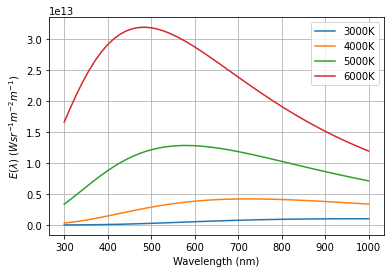

In [15]:
lam = np.linspace(300, 1000, 50)
for T in [3000, 4000, 5000, 6000]:
    e = color.blackbody(lam * nm, T)
    plt.plot(lam, e, label=f"{T}K")
plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('$E(\lambda)\,\, (W sr^{-1} m^{-2} m^{-1})$')
plt.legend()
plt.savefig('fig10_2a.eps')

Figure 10.2(b), need to add human eye response

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


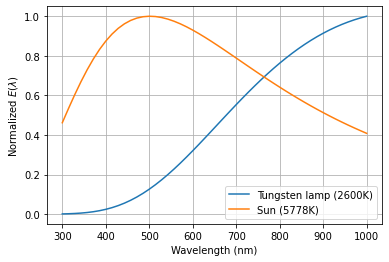

In [16]:
lam = np.linspace(300, 1000, 50)

e = color.blackbody(lam * nm, 2600)
plt.plot(lam, e / max(e), label="Tungsten lamp (2600K)")

e = color.blackbody(lam * nm, 5778)
plt.plot(lam, e / max(e), label="Sun (5778K)")

plt.grid(True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized $E(\lambda)$')
plt.legend()
plt.savefig('fig10_2b.eps')

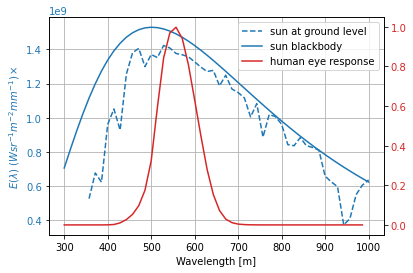

<Figure size 432x288 with 0 Axes>

In [18]:

sun_ground = color.loadspectrum(lam * nm, (Path('data') / 'solar').as_posix())
sun_blackbody = color.blackbody(lam * nm, 5778)
scale = 0.58e-4

eye_response = color.rluminos(lam * nm)

fig, ax1 = plt.subplots()  # create a figure and an axes

# set left axes
color1 = 'tab:blue'
l1 = ax1.plot(lam, sun_ground.s, '--', color=color1, label='sun at ground level')
l2 = ax1.plot(lam, sun_blackbody * scale, '-', color=color1, label='sun blackbody')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylabel(r'$E(\lambda)\,\, (W sr^{-1} m^{-2} mm^{-1}) \times$', color=color1)
ax1.set_xlabel('Wavelength [m]')

# set right axes
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color2 = 'tab:red'
l3 = ax2.plot(lam, eye_response, '-r', color=color2, label='human eye response')
ax2.tick_params(axis='y', labelcolor=color2)

ax1.grid()
legend_lines = l1 + l2 + l3
legend_labels = [leg.get_label() for leg in legend_lines]
ax1.legend(legend_lines, legend_labels)
plt.show()
plt.savefig('fig10_3a.eps')

Text(0, 0.5, 'T($\\lambda$)')

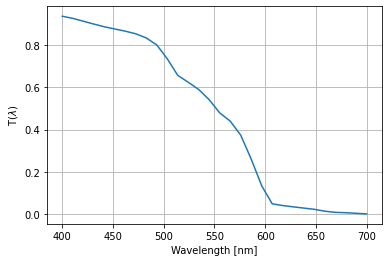

In [24]:
lam_water = np.linspace(400,700,30) 
water_spectrum = color.loadspectrum(lam_water * nm,(Path('data') / 'water').as_posix())
d = 5.0
T = 10.0**(- water_spectrum.s * d)

plt.plot(lam_water, T)
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'T($\lambda$)')

# TODO looks a bit different from 10.3b - is it the data, interpolation method, or plotting?
